In [1]:
from PIL import Image
import sys
sys.path.append('..')
from data_augmentation_for_yolo_training import *
# overlay = Image.open("/data/sswang/data/isc_data/training_images/D1035960.jpg")
# bg_img = Image.open("/data/sswang/data/isc_data/subset/reference_subset/R000000.jpg")

# # 笔记本电脑
# bg_img = Image.open("C:/Users/Lenovo/Desktop/AI/image_matching/data/training_data_background/T100017.jpg")
# overlay = Image.open("C:/Users/Lenovo/Desktop/AI/image_matching/data/training_data_background/T100041.jpg")

# 155服务器
# overlay = Image.open("/datassd2/sswang/image_matching/data/isc_data/training_imgs/training/T030000.jpg")
overlay = Image.open("/datassd2/sswang/image_matching/data/isc_data/training_imgs/training/T030000.jpg").convert('RGBA')
bg_img = Image.open("/datassd2/sswang/image_matching/data/isc_data/training_imgs/training_bg/T000000.jpg")

In [ ]:
meta = []
bg_aug_instance = generate_bg_aug(512, 512)


In [ ]:
display(bg_aug_instance(bg_img, meta))
meta

In [ ]:
meta = []
overlay_aug_instance = generate_overlay_aug()

In [ ]:
display(overlay_aug_instance(overlay, meta))
meta

In [ ]:
overlaied_img, yolo_label = overlay_image(bg_img=bg_img, overlay=overlay)
display(overlaied_img)
print(yolo_label)

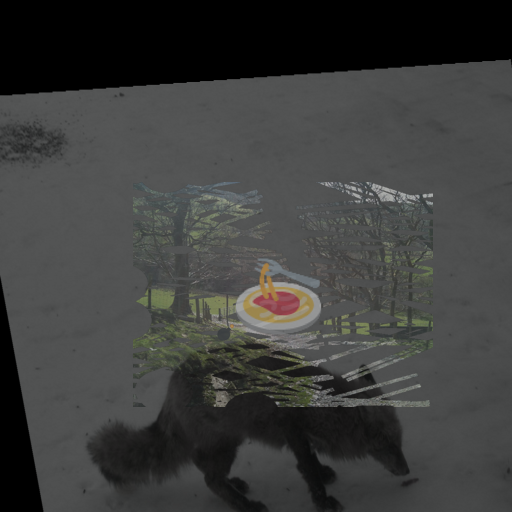

(0, 0.5536813623320848, 0.5760609377535166, 0.5859508909464068, 0.43946316820980513)


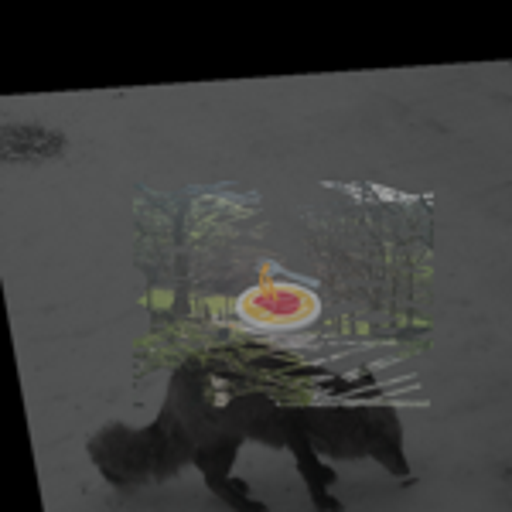

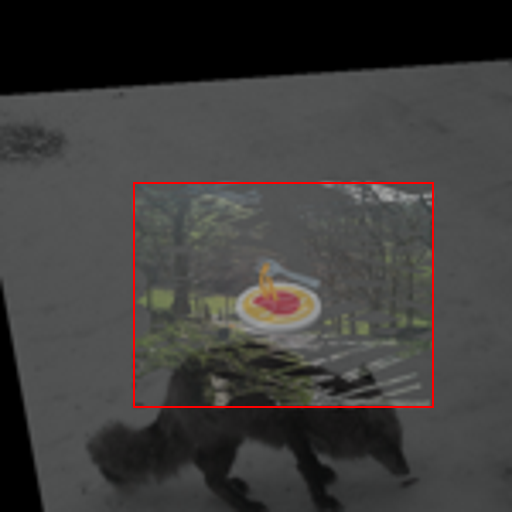

In [48]:
aug_level = 5
bg_aug_instance = generate_bg_aug(aug_level=aug_level, width=512, height=512)
overlay_aug_instance = generate_overlay_aug(aug_level=aug_level)
final_aug_instance = final_aug_(aug_level=aug_level)

auged_bg_img = bg_aug_instance(bg_img)
auged_overlay_img = overlay_aug_instance(overlay)

overlaied_img, yolo_label = overlay_image(bg_img=auged_bg_img, overlay=auged_overlay_img)
display(overlaied_img)
print(yolo_label)


final_img = final_aug_instance(overlaied_img)
final_img.convert("RGB").save("/datassd2/sswang/image_matching/data/test_output/final_img.jpg")
display(final_img)


yolo_rectangle = draw_yolo_rectangle(yolo_label=yolo_label, img = final_img)
display(yolo_rectangle)

In [ ]:
for i in range(6):
    # 每增强十轮之后重新构造数据增强对象
    print("第{}轮开始".format(i))
    bg_aug = generate_bg_aug(aug_level =i)
    overlay_aug = generate_overlay_aug(aug_level = i)
    final_aug = final_aug_(aug_level = i)
    print("第{}轮结束".format(i))